# Classes and Functions

Execute all cells.

In [ ]:
import random

class Grid_Environment:
    def __init__ (self, X, Y):
        self.X = X
        self.Y = Y
        self.state = (1,1)
        self.goal = (X,Y)

        states = []
        for x in range(X):
            for y in range(Y):
                states = states + [(x+1,y+1)]
        self.states = (*states, )

        self.actions = ('w', 's', 'd', 'a' )

    moveAction = {
        'w': (0,1),
        's': (0,-1),
        'd': (1,0),
        'a': (-1,0)
    }

    def reset(self):
        self.state = (1,1)

    def move(self,state,shift):
        x = min(max(state[0] + shift[0],1),self.X)
        y = min(max(state[1] + shift[1],1),self.Y)
        return (x,y)


    def reward(self,state, action):
        if state == self.goal:
            return 0
        else:
            return -1

    def nextState(self,state, action):
        nextStates = {}

        if state == self.goal:
          nextStates[self.goal] = 1.0
          return nextStates

        next = self.move(state,self.moveAction[action])
        nextStates[next] = 1.0

        return nextStates

    def simulateStep(self,state,action):
        r = self.reward(state, action)
        nextStates = self.nextState(state,action)
        return random.choices( list( nextStates.keys() ), weights = list( nextStates.values() ), k=1 )[0], r


    def step(self,action):
        self.state, r  = self.simulateStep(self.state,action)
        return self.state, r

    def render(self):
        print('')
        for j in range(self.Y,0,-1):
            for i in range(1,self.X+1):
                if self.state == (i,j):
                    print('A',end='')
                elif self.goal == (i,j):
                    print('G',end='')
                else:
                    print('*',end='')
            print('')

In [ ]:
class GridWind_Environment(Grid_Environment):
    windUp = (0,1)
    windDown = (0,-1)
    windLeft = (-1,0)

    def nextState(self,state, action):
        nextStates = {}

        if state == self.goal:
          nextStates[self.goal] = 1.0
          return nextStates

        if state[0]/self.X >= 0.5 and state[0] < self.X and state[1]/self.Y > 0.5:
          next = self.move(state,self.moveAction[action])
          nextStates[next] = 0.5

          next = self.move(state,self.moveAction['w'])
          if next in nextStates:
              nextStates[next] = nextStates[next] + 0.25
          else:
              nextStates[next] = 0.25

          next = self.move(state,self.moveAction['a'])
          if next in nextStates:
              nextStates[next] = nextStates[next] + 0.25
          else:
              nextStates[next] =  0.25

        elif state[0]/self.X <= 0.5 and state[0] > 1 and state[1]/self.Y <= 0.5:
          next = self.move(state,self.moveAction[action])
          nextStates[next] = 0.5

          next = self.move(state,self.moveAction['s'])
          if next in nextStates:
              nextStates[next] = nextStates[next] + 0.25
          else:
              nextStates[next] =  0.25

          next = self.move(state,self.moveAction['a'])
          if next in nextStates:
              nextStates[next] = nextStates[next] + 0.25
          else:
              nextStates[next] =  0.25
        else:
          next = self.move(state,self.moveAction[action])
          nextStates[next] = 1.0


        return nextStates


    def render(self):
        print('')
        for j in range(self.Y,0,-1):
            for i in range(1,self.X+1):
                if self.state == (i,j):
                    print('A',end='')
                elif self.goal == (i,j):
                    print('G',end='')
                elif i/self.X >= 0.5 and i < self.X and j/self.Y > 0.5:
                    print('$',end='')
                elif i/self.X <= 0.5 and i > 1 and j/self.Y <= 0.5:
                    print('#',end='')
                else:
                    print('*',end='')
            print('')

In [ ]:
class GridQuad_Environment(Grid_Environment):
    Q1 = { 'a' : 'd', 's' : 'w' , 'd' : 'a', 'w':'s' }
    Q2 = { 'a' : 'w', 's' : 'a' , 'd' : 's', 'w':'d' }
    Q3 = { 'a' : 'w', 's' : 'd' , 'd' : 'a', 'w':'s' }
    Q4 = { 'a' : 's', 's' : 'd' , 'd' : 'w', 'w':'a' }

    def nextState(self,state, action):
        nextStates = {}

        if state == self.goal:
          nextStates[self.goal] = 1.0
          return nextStates

        if self.state[0]/self.X <= 0.5 and self.state[1]/self.Y <= 0.5:
          next = self.move(state,self.moveAction[self.Q2[action]])
          nextStates[next] = 1.0
        elif self.state[0]/self.X > 0.5 and self.state[1]/self.Y <= 0.5:
          next = self.move(state,self.moveAction[self.Q3[action]])
          nextStates[next] = 1.0
        elif self.state[0]/self.X <= 0.5 and self.state[1]/self.Y > 0.5:
          next = self.move(state,self.moveAction[self.Q4[action]])
          nextStates[next] = 1.0
        elif self.state[0]/self.X > 0.5 and self.state[1]/self.Y > 0.5:
          next = self.move(state,self.moveAction[self.Q1[action]])
          nextStates[next] = 1.0

        return nextStates


    def render(self):
        print('')
        for j in range(self.Y,0,-1):
            for i in range(1,self.X+1):
                if self.state == (i,j):
                    print('A',end='')
                elif self.goal == (i,j):
                    print('G',end='')
                elif i/self.X <= 0.5 and j/self.Y <= 0.5:
                    print('$',end='')
                elif i/self.X > 0.5 and j/self.Y <= 0.5:
                    print('#',end='')
                elif i/self.X <= 0.5 and j/self.Y > 0.5:
                    print('@',end='')
                else:
                    print('*',end='')
            print('')

In [ ]:
class GridQuadInv_Environment(Grid_Environment):
    Q1 = { 'a' : 'd', 's' : 'w' , 'd' : 'a', 'w':'s' }
    Q2 = { 'a' : 'w', 's' : 'a' , 'd' : 's', 'w':'d' }
    Q3 = { 'a' : 'w', 's' : 'd' , 'd' : 'a', 'w':'s' }
    Q4 = { 'a' : 's', 's' : 'd' , 'd' : 'w', 'w':'a' }

    def nextState(self,state, action):
        nextStates = {}

        if state == self.goal:
          nextStates[self.goal] = 1.0
          return nextStates

        if self.state[0]/self.X <= 0.3 and self.state[1]/self.Y <= 0.3:
          next = self.move(state,self.moveAction[self.Q3[action]])
          nextStates[next] = 1.0
        elif self.state[0]/self.X > 0.3 and self.state[1]/self.Y <= 0.3:
          next = self.move(state,self.moveAction[self.Q4[action]])
          nextStates[next] = 1.0
        elif self.state[0]/self.X <= 0.3 and self.state[1]/self.Y > 0.3:
          next = self.move(state,self.moveAction[self.Q1[action]])
          nextStates[next] = 1.0
        elif self.state[0]/self.X > 0.3 and self.state[1]/self.Y > 0.3:
          next = self.move(state,self.moveAction[self.Q2[action]])
          nextStates[next] = 1.0

        return nextStates


    def render(self):
        print('')
        for j in range(self.Y,0,-1):
            for i in range(1,self.X+1):
                if self.state == (i,j):
                    print('A',end='')
                elif self.goal == (i,j):
                    print('G',end='')
                # elif i/self.X <= 0.3 and j/self.Y <= 0.3:
                #     print('$',end='')
                # elif i/self.X > 0.3 and j/self.Y <= 0.3:
                #     print('#',end='')
                # elif i/self.X <= 0.3 and j/self.Y > 0.3:
                #     print('@',end='')
                else:
                    print('*',end='')
            print('')

In [ ]:
import time
import numpy as np
from IPython.display import clear_output

def Simulate(env,maxSteps):
  env.reset()
  tempo = .25
  clear_output(wait=True)
  env.render()

  steps = 0

  while steps < maxSteps:

      breakSignal = False
      command = input("Write 'w', 'a', 's', 'd' to move: ")
      for a in command:
        s = env.state
        if s == env.goal:
            breakSignal = True
            break
        if a in ['w', 'a', 's', 'd']:
            env.step(a)
            steps += 1

        clear_output(wait=True)
        env.render()
        time.sleep(tempo)
      if env.state == env.goal or breakSignal:
        break

  if env.state == env.goal:
    print(f"Congratulations. You spent {steps} steps to reach the Goal.")
    input("Press enter to go to the next task.")
  else:
    print(f"You fail to reach the goal.")
    input("Press enter to go to the next task.")

  return steps

def EvaluatePolicyMC(env,policy,maxSteps,nSamples):

  memSteps = []
  memGoals = []

  for i in range(nSamples):
    env.reset()
    steps = 0

    while steps < maxSteps:
      s = env.state
      a = policy[s]
      if s == env.goal:
          break
      if a in ['w', 'a', 's', 'd']:
          env.step(a)
          steps += 1

    if env.state == env.goal:
      memGoals = memGoals + [1]
      memSteps = memSteps + [steps]
    else:
      memGoals = memGoals + [0]


    clear_output(wait=True)
    print(f'Simulating {(i+1)/nSamples}')

  print(f'The goal was rechead {100*np.mean(memGoals)}% of the simulations.')
  if len(memSteps) > 0:
    print(f'The average steps in simulations that rechead the goal was {np.mean(memSteps)}.')

  return memSteps, memGoals

def SimulatePolicy(env,policy,maxSteps):
  env.reset()
  tempo = .25
  clear_output(wait=True)
  env.render()

  steps = 0

  while steps < maxSteps:
    s = env.state
    a = policy[s]
    if s == env.goal:
        break
    if a in ['w', 'a', 's', 'd']:
        env.step(a)
        steps += 1

    clear_output(wait=True)
    env.render()
    time.sleep(tempo)
  if env.state == env.goal:
    print(f"Congratulations. You spent {steps} steps to reach the Goal.")
  else:
    print(f"You fail to reach the goal.")

  return steps

def SimulatePlan(env,plan):
  env.reset()
  tempo = .25
  clear_output(wait=True)
  env.render()

  steps = 0

  for a in plan:
    s = env.state
    if s == env.goal:
        break
    if a in ['w', 'a', 's', 'd']:
        env.step(a)
        steps += 1

    clear_output(wait=True)
    env.render()
    time.sleep(tempo)
  if env.state == env.goal:
    print(f"Congratulations. You spent {steps} steps to reach the Goal.")
  else:
    print(f"You fail to reach the goal.")

  return steps

In [ ]:
def value_iteration(Environment,gamma, eps):
    V = {}
    for s in Environment.states:
        V[s] = 0

    res = float('inf')

    if gamma < 1:
        epsilon = eps*(1-gamma)/(2*gamma)
    else:
        epsilon = eps

    while res > epsilon:
        V_old = V.copy()
        res = 0

#       Encontra a função valor epsilon-ótima
        for s in Environment.states:
            Q = {}
            for a in Environment.actions:
                Q[a] = Environment.reward(s,a)
                Transitions = Environment.nextState(s,a)
                for ss in Transitions:
                    Q[a] = Q[a] + gamma*Transitions[ss]*V_old[ss]

            V[s] = max(Q.values())

            if abs(V[s] - V_old[s]) > res:
                res = abs(V[s] - V_old[s])

#   Extrai a política epsilon-ótima
    pi = {}
    for s in Environment.states:
        Q = {}
        for a in Environment.actions:
            Q[a] = Environment.reward(s,a)
            Transitions = Environment.nextState(s,a)
            for ss in Transitions:
                Q[a] = Q[a] + gamma*Transitions[ss]*V[ss]

        pi[s] = max(Q, key=Q.get)


    return pi, V

# Execution 1: Temporal Difference Evaluation vs Monte Carlo Evaluation


Expand the cells, before executing them.

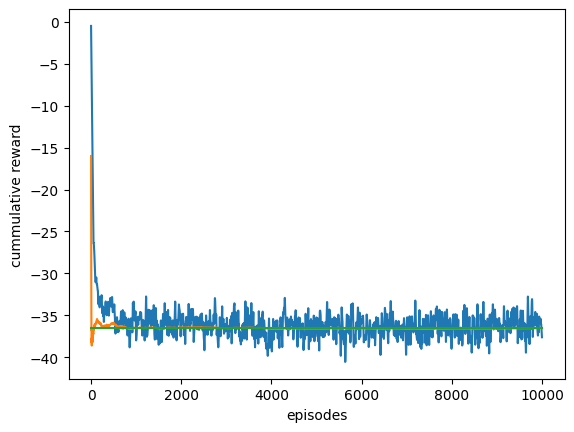

In [ ]:
import numpy as np

gamma = 1

grid = GridWind_Environment(20,10)
pi, v_VI = value_iteration(grid,gamma, 0.00001)

Vs_td = []
Vs_mc = []

N = 10000

alpha = 0.5

V_td = {}
for s in grid.states:
    V_td[s] = 0
V_td[grid.goal] = 0

V_mc = 0

# V_td = v_VI.copy()

for n in range(N):
    rCum = 0
    grid.reset()
    for i in range(200):

        s = grid.state    # observes
        if s == grid.goal:
            break

        a = pi[s]         # chooses an action
        ss, r = grid.step(a)  # observes next state and reward


        # alpha = 1/(n+1)

        # temporal diference
        V_td[s] = V_td[s] +  alpha*( r + gamma*V_td[ss] - V_td[s])

        # Monte Carlo
        rCum += r

    # Monte Carlo (only for initial state)
    V_mc = V_mc + alpha*(rCum - V_mc)

    Vs_td = Vs_td + [V_td[(1,1)]]
    Vs_mc = Vs_mc + [V_mc]

import matplotlib.pyplot as plt
media_tempo_td = np.cumsum(Vs_td)/(np.arange(N)+1)
media_tempo_mc = np.cumsum(Vs_mc)/(np.arange(N)+1)
plt.plot(Vs_td)
plt.plot(media_tempo_mc)
plt.plot([1,N],[v_VI[(1,1)], v_VI[(1,1)]])
plt.ylabel('cummulative reward')
plt.xlabel('episodes')
plt.show()

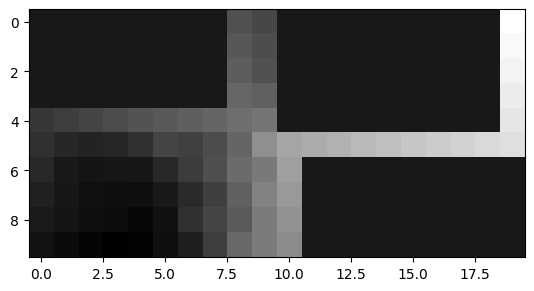

In [ ]:
V = V_td.copy()

img = np.zeros((grid.Y,grid.X))
for j in range(1,grid.Y+1):
  for i in range(1,grid.X+1):
    img[grid.Y - j,i-1] = V[(i,j)]
plt.imshow(img, cmap='gray', vmin=min(V_td.values()), vmax=max(V.values()))
plt.show()

# Execution 2: Q-Learning

Expand the cells, before executing them.

In [ ]:
def QLearning(Qsa,grid,alpha,gamma,maxSteps,render=False):
  count_goal = []
  last_goal = 0
  rewards = []

  for i in range(maxSteps):
      s = grid.state

      if s == grid.goal:
          grid.reset()
          count_goal = count_goal + [i-last_goal]
          last_goal = i
          rewards = rewards + [0]
          continue

      if random.random() < epsilon:
          a = random.choice(grid.actions)
      else:
          a = max(Qsa[s], key=Qsa[s].get)

      ss, r = grid.step(a)
      rewards = rewards + [r]

      Qsa[s][a] = Qsa[s][a] + alpha*( r + gamma*max(Qsa[ss].values()) -  Qsa[s][a])

  return Qsa, rewards, count_goal


In [ ]:
import time
from IPython.display import clear_output

tempo = .25

epsilon = 0.1
alpha = 0.25
gamma = 1
maxSteps = 2000

grid = GridWind_Environment(10,5)


# Inicializa valores

Qa = {}
for a in grid.actions:
    Qa[a] = 1


Qsa = {}
for s in grid.states:
    Qsa[s] = Qa.copy()

QLearning(Qsa,grid,alpha,gamma,maxSteps,render=True);



In [ ]:
import time
from IPython.display import clear_output

tempo = .25

epsilon = 0.05
alpha = 0.25
gamma = 1


grid = GridWind_Environment(20,10)
maxSteps = 100000


# Inicializa valores

Qa = {}
for a in grid.actions:
    Qa[a] = 0


Qsa = {}
for s in grid.states:
    Qsa[s] = Qa.copy()




Qsa, rewards, count_goal = QLearning(Qsa,grid,alpha,gamma,maxSteps,render=True)

print(len(count_goal))



570


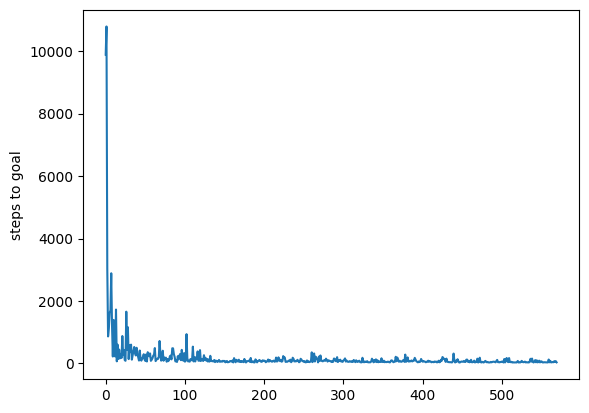

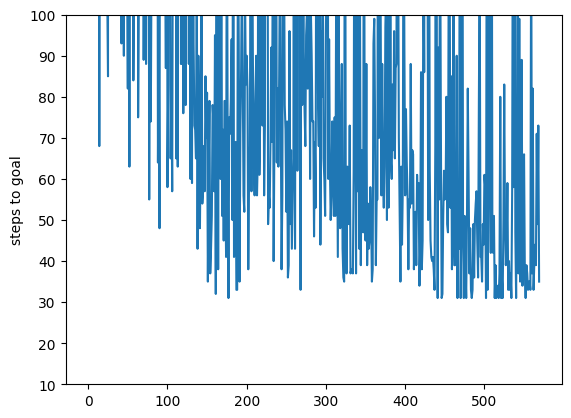

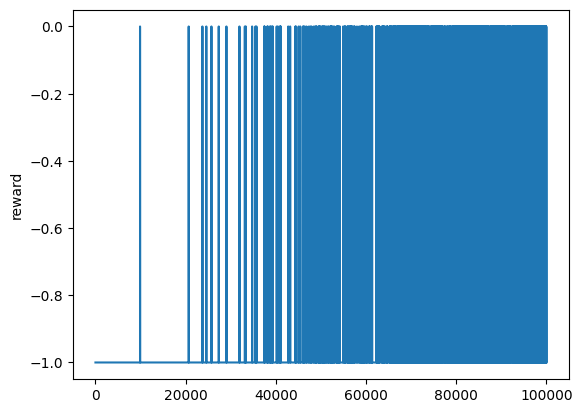

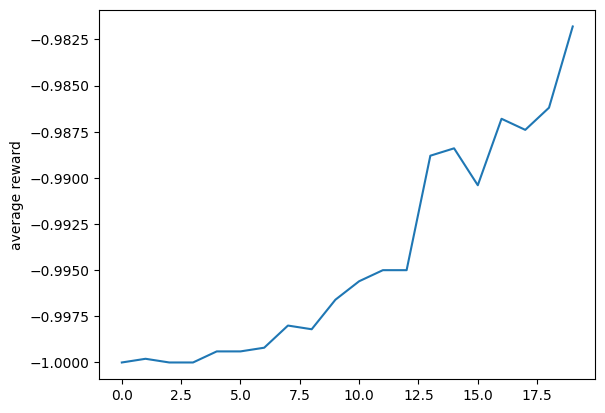

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(len(count_goal)),count_goal)
plt.ylabel('steps to goal')
plt.show()

plt.plot(range(len(count_goal)),count_goal)
plt.ylabel('steps to goal')
plt.ylim(10,100)
plt.show()


plt.plot(rewards)
plt.ylabel('reward')
plt.show()

import numpy as np

data = np.array(rewards).reshape((20,-1))
plt.plot(np.mean(data,axis=1))
plt.ylabel('average reward')
plt.show()

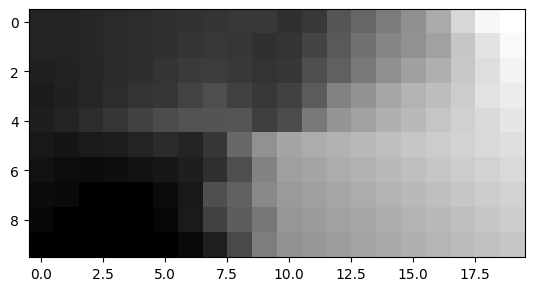

In [ ]:
# V = V_td.copy()

for s in grid.states:
    V[s] = max(Qsa[s].values())

img = np.zeros((grid.Y,grid.X))
for j in range(1,grid.Y+1):
  for i in range(1,grid.X+1):
    img[grid.Y - j,i-1] = V[(i,j)]
plt.imshow(img, cmap='gray', vmin=min(V_td.values()), vmax=max(V.values()))
plt.show()